In [2]:
from deap import tools
from deap import algorithms

def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook

In [50]:
import pandas as pd

In [51]:
df_distance=pd.read_csv('distances2.csv')

In [297]:
import random

import numpy as np
import matplotlib.pyplot as plt

import tsp


class Assignment:
    def __init__(self,Min_Adn, Max_Adn,df_distance ):
        """
        Creates an instance of a VRP
        :param tspName: name of the underlying TSP
        :param numOfVehicles: number of vehicles used
        :param depotIndex: the index of the TSP city that will be used as the depot location
        """
       
        self.Min_Adn = Min_Adn
        self.Max_Adn = Max_Adn
        self.df_distance=df_distance
        self.List_Adn= list( np.unique(df_distance.COD_FUNCIONAIO).astype(int))
        self.List_clientes=list( np.unique(df_distance.CO_CLIENTE).astype(int))
        self.N_Adn= len(self.List_Adn)
        self.N_Clie= len(self.List_clientes)

    def __len__(self):
        """
        returns the number of indices used to internally represent the VRP
        :return: the number of indices used to internally represent the VRP
        """
        return len(self.List_Adn) + len(self.List_clientes)
    
    def get_distance (self, id_cliente, id_adn ):
        
        return list(df_distance[(self.df_distance.COD_FUNCIONAIO==self.List_Adn[id_adn]   )  & 
                                (self.df_distance.CO_CLIENTE==self.List_clientes[id_cliente] ) ]["DISTANCE"])[0]
    
    def get_grupos(self, indices):
        
        groups = []
        group= []

        # loop over all indices in the list:
        for i in indices:

                  # index is part of the current route:
            if not self.isSeparatorIndex(i):
                group.append(i)

            # separator index - route is complete:
            else:
                groups.append(group)
                group = []  # reset route

        # append the last route:
        if not self.isSeparatorIndex(i):
            groups.append(group)

        return groups
    
    
    def get_adns (self, indices):
        adns=[]
        
        for i in indices:
            if i >= len(self.List_clientes):
                adns.append(i)
        return adns
    def isSeparatorIndex(self, index):
        """
        Finds if curent index is a separator index
        :param index: denotes the index of the location
        :return: True if the given index is a separator
        """
        # check if the index is larger than the number of the participating locations:
        return index >= len(self.List_clientes)# - ( len (self.List_Adn)-1)
    def get_unassigned_client(self, indices):#obtener clientes desatendidos
        adn_g=asi.get_adns(indices)
        car_g=asi.get_grupos(indices)
        return len(adn_g)< len (car_g)
    
    def get_unique_distance(self,idx_cli,idx_funci,indices): #encontrar distancia entre asesor cliente
        adn_g=asi.get_adns(indices)
        idx_funci= idx_funci-min(adn_g)
        return list(df_distance[(df_distance.COD_FUNCIONAIO==self.List_Adn[idx_funci]   )  &  (df_distance.CO_CLIENTE==self.List_clientes[idx_cli]   )        ]["DISTANCE"])[0]
 
    def get_distance_group (self,indices):
      
        if self.get_unassigned_client(indices): return 100000 #clientes desatendidos
        adn_g=asi.get_adns(indices)
        car_g=asi.get_grupos(indices)
        distances=[]
        distance=[]
        i=0
        for carte in car_g:
            if carte==[]:
                distances.append([0])#asesor sin adns
            
            else:
                for cliente in carte:
                    distance.append( self.get_unique_distance(cliente,adn_g[i],indices)   )
                distances.append(distance)
                distance=[]
            i+=1
        return distances
            
    def 
    
    

In [265]:
asi=Assignment(10,12,df_distance)

In [152]:
aux=df_distance.sample(10)

df_distance2= df_distance[ (df_distance.COD_FUNCIONAIO.isin( aux.COD_FUNCIONAIO) )  & ( df_distance.CO_CLIENTE.isin( aux.CO_CLIENTE)   )  ]    

In [290]:
for i in range(100000):
    randomSolution = random.sample(range(len(asi)), len(asi))
    adn_g=asi.get_adns(randomSolution)
    car_g= asi.get_grupos(randomSolution)
    if len(adn_g)== len (car_g) : break

In [303]:
asi=Assignment(10,12,df_distance2)
randomSolution = [ 1, 9, 0, 17, 7, 14, 11, 12, 18, 6, 3, 5, 2, 19, 4, 16, 13,8,15,10]
adn_g=asi.get_adns(randomSolution)
car_g= asi.get_grupos(randomSolution)
distances= asi.get_distance_group(randomSolution)

In [304]:
adn_g, len(adn_g), len(car_g)

([17, 14, 11, 12, 18, 19, 16, 13, 15, 10], 10, 10)

In [305]:
distances

[[8417, 4826, 3665],
 [1525],
 [0],
 [0],
 [0],
 [1767, 2694, 3225, 5073],
 [5426],
 [0],
 [5026],
 [0]]

In [306]:
car_g

[[1, 9, 0], [7], [], [], [], [6, 3, 5, 2], [4], [], [8], []]

In [307]:
randomSolution

[1, 9, 0, 17, 7, 14, 11, 12, 18, 6, 3, 5, 2, 19, 4, 16, 13, 8, 15, 10]

In [67]:
vrp.getMaxDistance(randomSolution)

15673.441

In [66]:
vrp.getRoutes(randomSolution)

[[2, 16, 5, 26, 15, 28, 13, 27, 10, 21, 8, 25, 4, 17, 19],
 [11, 6, 23, 7, 3, 1, 22, 24, 18, 9, 0, 14],
 []]

In [45]:
from deap import base
from deap import creator
from deap import tools

import random
import array

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import vrp
import elitism

In [ ]:

# set the random seed:
RANDOM_SEED = 2021
random.seed(RANDOM_SEED)

# create the desired vehicle routing problem using a traveling salesman problem instance:
#TSP_NAME = "bayg29"
NUM_OF_VEHICLES = 3
DEPOT_LOCATION = 12
vrp = vrp.VehicleRoutingProblem(TSP_NAME, NUM_OF_VEHICLES, DEPOT_LOCATION)

# Genetic Algorithm constants:
POPULATION_SIZE = 800
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.2   # probability for mutating an individual
MAX_GENERATIONS = 1000
HALL_OF_FAME_SIZE = 30

toolbox = base.Toolbox()


gen	nevals	min    	avg    
0  	800   	8629.48	16795.8
1  	723   	8473.92	14742  
2  	705   	8207.62	13338.4
3  	694   	7878.68	12499.7
4  	713   	7878.68	11863.9
5  	706   	7878.68	11346.6
6  	721   	7878.68	10822.9
7  	721   	7707.11	10743.8
8  	703   	7339.07	10436.1
9  	712   	7093.57	10274.4
10 	701   	6927.33	9902.3 
11 	704   	6927.33	9704.84
12 	700   	6447.98	9564.83
13 	705   	6447.98	9719.54
14 	722   	6447.98	9608.38
15 	708   	6447.98	9399.27
16 	704   	6447.98	9121.2 
17 	716   	6447.98	9084.38
18 	707   	6404.81	9041.38
19 	704   	6381.48	8948.59
20 	719   	6135.29	8775.65
21 	704   	6135.29	8725.15
22 	714   	6135.29	8504.85
23 	718   	6077.37	8349.36
24 	707   	6077.37	8051.58
25 	705   	6077.37	7993.37
26 	695   	6077.37	7655.72
27 	698   	5879.9 	7483.07
28 	708   	5823.52	7398.44
29 	706   	5823.52	7147.31
30 	684   	5823.52	6964.71
31 	711   	5660.49	6750.45
32 	720   	5660.49	6666.73
33 	704   	5519.84	6627.39
34 	724   	5519.84	6587.58
35 	688   	5519.84	6473.34
3

<Figure size 432x288 with 0 Axes>

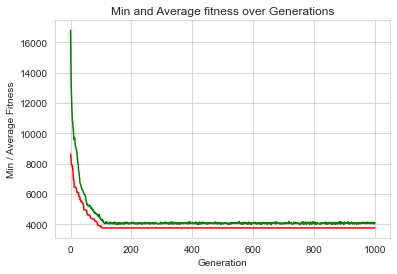

In [33]:
from deap import base
from deap import creator
from deap import tools

import random
import array

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import vrp
import elitism

# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)


asi = asi.as(TSP_NAME, NUM_OF_VEHICLES, DEPOT_LOCATION)

# Genetic Algorithm constants:
POPULATION_SIZE = 800
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.2   # probability for mutating an individual
MAX_GENERATIONS = 1000
HALL_OF_FAME_SIZE = 30

toolbox = base.Toolbox()

# define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on list of integers:
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

# create an operator that generates randomly shuffled indices:
toolbox.register("randomOrder", random.sample, range(len(vrp)), len(vrp))

# create the individual creation operator to fill up an Individual instance with shuffled indices:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)

# create the population creation operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation - compute the max distance that the vehicles covered
# for the given list of cities represented by indices:
def vrpDistance(individual):
    return vrp.getMaxDistance(individual),  # return a tuple


toolbox.register("evaluate", vrpDistance)

# Genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(vrp))
toolbox.register("mate", tools.cxUniformPartialyMatched, indpb=2.0/len(vrp))


# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print best individual info:
    best = hof.items[0]
    print("-- Best Ever Individual = ", best)
    print("-- Best Ever Fitness = ", best.fitness.values[0])

    print("-- Route Breakdown = ", vrp.getRoutes(best))
    print("-- total distance = ", vrp.getTotalDistance(best))
    print("-- max distance = ", vrp.getMaxDistance(best))

    # plot best solution:
    plt.figure(1)
    #vrp.plotData(best)

    # plot statistics:
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
    plt.figure(2)
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')

    # show both plots:
    plt.show()


if __name__ == "__main__":
    main()

In [34]:
population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

NameError: name 'stats' is not defined